In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings


In [67]:
warnings.filterwarnings('ignore')

In [69]:
# We could always use read_csv the only change is we need to pass the separator, this file is separated by tab
# Need to check for duplicates and missing values
column_name = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('./ml-100k/u.data', header = None, names = column_name, sep = '\t')

In [71]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [73]:
df.shape

(100000, 4)

In [75]:
df['user_id'].nunique() # To get the unnique user count

943

In [77]:
df['item_id'].nunique()

1682

In [79]:
df['rating'].unique() #To check the lovs

array([3, 1, 2, 4, 5])

In [81]:
movies_title = pd.read_csv('./ml-100k/u.item', sep = '\|', header = None, encoding = 'latin-1')
#Using laTing 1 just to make sure there are no encoding

In [83]:
movies_title.shape


(1682, 24)

In [85]:
movies_titles = movies_title[[0,1]]


In [87]:
movies_titles.columns = ['item_id', 'title']

In [89]:
movies_titles.head()


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [91]:
df = df.merge(movies_titles, on = ['item_id'] )
#join function

In [93]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)
99999,12,203,3,879959583,Unforgiven (1992)


In [95]:
# Will have to do some exploratory data analysis

In [97]:
import seaborn as sns


In [99]:
df.groupby(['title']).mean()['rating'].sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [101]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [41]:
'''
grouped = df.groupby('item_id').agg({
    'rating': ['mean', 'count'],         # average and count of ratings
    'timestamp': 'max',                  # latest timestamp
    'user_id': 'nunique'                 # number of unique users
})
print(grouped.shape)
'''

In [109]:
try:
    ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
    print("ratings created successfully")
except Exception as e:
    print("Error:", e)


ratings created successfully


In [111]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [125]:

grouped = df.groupby('title').agg({
    'rating': 'mean',         # average and count of ratings
                      # latest timestamp
    'user_id': 'nunique'                 # number of unique users
})
print(grouped.head())

                             rating  user_id
title                                       
'Til There Was You (1997)  2.333333        9
1-900 (1994)               2.600000        5
101 Dalmatians (1996)      2.908257      109
12 Angry Men (1957)        4.344000      125
187 (1997)                 3.024390       41


In [127]:
grouped.columns = [ 'rating', 'num of ratings']

In [129]:
ratings = grouped

In [131]:
ratings.head(10)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [133]:
ratings.sort_values(by = 'rating', ascending = False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


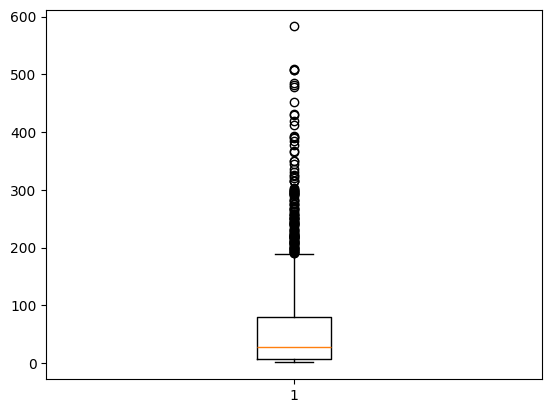

In [141]:
 plt.boxplot(ratings['num of ratings'])
plt.show()

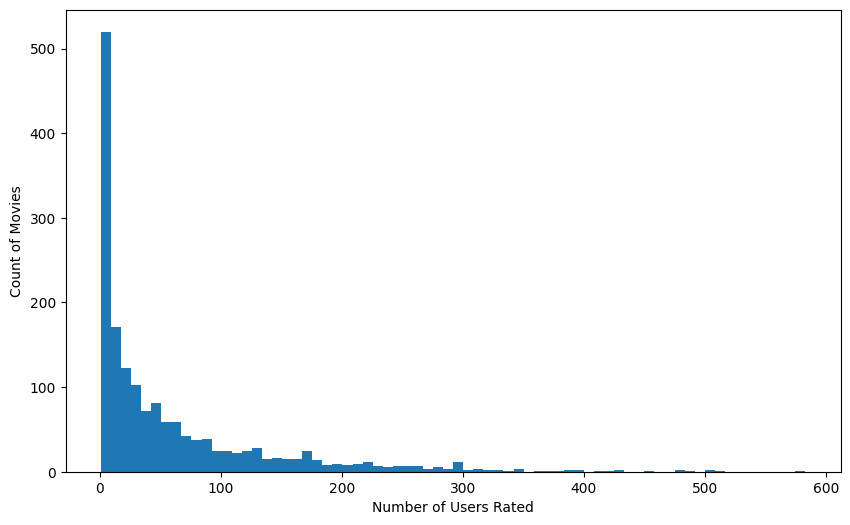

In [145]:
plt.figure(figsize =  (10, 6))
plt.xlabel('Number of Users Rated')
plt.ylabel('Count of Movies')
plt.hist(ratings['num of ratings'], bins = 70)
plt.show()


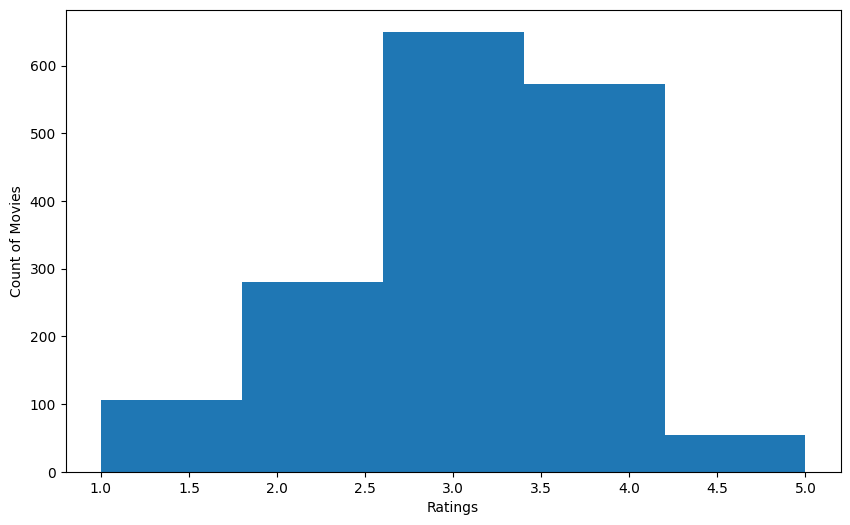

In [154]:
plt.figure(figsize = (10, 6))
plt.hist(ratings['rating'], bins = 5)
plt.xlabel('Ratings')
plt.ylabel('Count of Movies')
plt.show()

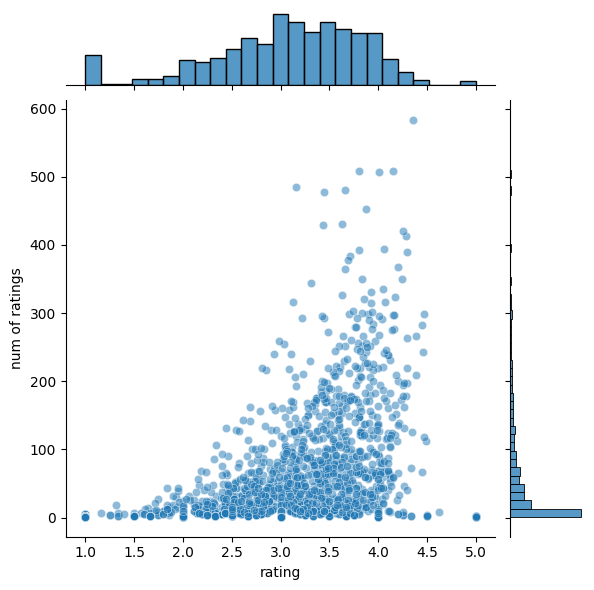

In [156]:
sns.jointplot(x = 'rating', y ='num of ratings' , data = ratings, alpha = 0.5)

<Axes: xlabel='rating', ylabel='num of ratings'>

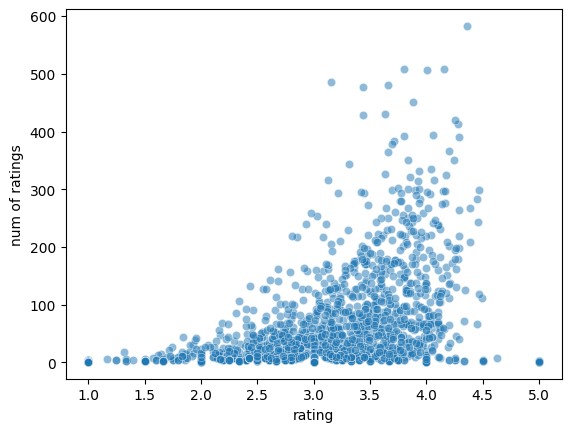

In [174]:
sns.scatterplot(x='rating', y='num of ratings', data=ratings, alpha = 0.5)


In [176]:
# Creating Movie Recommendation

In [178]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [182]:
 moviemat =  df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [184]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [190]:
moviemat.isnull().sum()

title
'Til There Was You (1997)                934
1-900 (1994)                             938
101 Dalmatians (1996)                    834
12 Angry Men (1957)                      818
187 (1997)                               902
                                        ... 
Young Guns II (1990)                     899
Young Poisoner's Handbook, The (1995)    902
Zeus and Roxanne (1997)                  937
unknown                                  934
Á köldum klaka (Cold Fever) (1994)       942
Length: 1664, dtype: int64

In [194]:
  ratings.sort_values('num of ratings', ascending = False)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
To Cross the Rubicon (1991),1.000000,1
"I, Worst of All (Yo, la peor de todas) (1990)",1.000000,1
Small Faces (1995),2.000000,1


In [204]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [206]:
# The next step would be to find the correlation between all the movie columns

In [208]:
moviemat.corrwith(starwars_user_ratings) # Find the corr with corr with command
# There are Nan values to which means there are no two users which watched both the movies

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [228]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [244]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation']).dropna().sort_values(by = 'Correlation', ascending = False)
#Using drop na to drop null value

In [248]:
corr_starwars.head(10)
# +1 means highly correlated, very high chances of user liking the movie if they have like another movie

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [266]:
ratings.loc[ 'Star Wars (1977)', 'num of ratings' ]

583

In [268]:
ratings.loc['Hollow Reed (1996)','num of ratings']

6

In [270]:
#therefore we dont actually want these cases where the overlap is too small and want to ignore them from our analysis
# So we could put athrfeshold on the number of users

In [282]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])


In [286]:
corr_starwars.head()

,Correlation,num of ratings
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5


In [288]:
#take only the movies where the number of ratings is greater than or equal to 100

In [306]:
corr_starwars[(corr_starwars['num of ratings'] > 100) &
(corr_starwars['Correlation'] > 0.7) ].sort_values(by = 'Correlation', ascending = False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367


In [328]:
#predict Function

def predict_movies(movie_name):
    movie_user_rating = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_rating)

    corr_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie['num of ratings']>100].sort_values(by = 'Correlation', ascending = False)
    return predictions

In [332]:
predictions = predict_movies('Titanic (1997)')

In [334]:
predictions.head()

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
